In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
dataset_path="D:\\suman.aids\\Cats vs Dogs" 
sample_digit = "Petimages\\Cat"  
image_files = os.listdir(os.path.join(dataset_path, sample_digit))
image_path = os.path.join(dataset_path, sample_digit, image_files[0])
image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(31,31))
image=image.astype(np.float32)/255.0

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(3, (3, 3), activation='relu', input_shape=(31, 31, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2883, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
val_images = np.expand_dims(image, axis=0) 
val_labels = np.array([[0, 1]])
dummy_labels = np.array([[1, 0]])  # Example label for cat
dummy_images = np.expand_dims(image, axis=0)  # Expand dims to match batch size
history = model.fit(dummy_images, dummy_labels, epochs=5, verbose=1, validation_data=(val_images, val_labels))

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 0.9064 - val_accuracy: 0.0000e+00 - val_loss: 7.9963
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 3.3683e-04 - val_accuracy: 0.0000e+00 - val_loss: 12.5872
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 1.0000 - loss: 3.4571e-06 - val_accuracy: 0.0000e+00 - val_loss: 15.9219
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 1.1921e-07 - val_accuracy: 0.0000e+00 - val_loss: 18.6231
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 20.9292


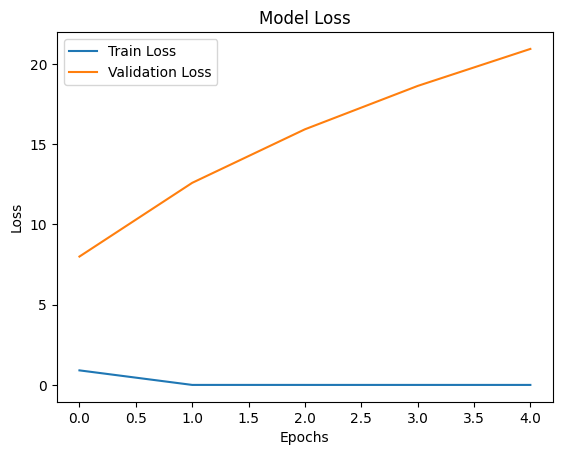

Initial Training Accuracy: 0.00%
Initial Validation Accuracy: 0.00%


In [5]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

initial_accuracy = history.history['accuracy'][0]
validation_accuracy = history.history['val_accuracy'][0]
print(f'Initial Training Accuracy: {initial_accuracy * 100:.2f}%')
print(f'Initial Validation Accuracy: {validation_accuracy * 100:.2f}%')

In [6]:
initial_accuracy = history.history['accuracy'][0]
print(f'Initial Accuracy: {initial_accuracy * 100:.2f}%')

Initial Accuracy: 0.00%


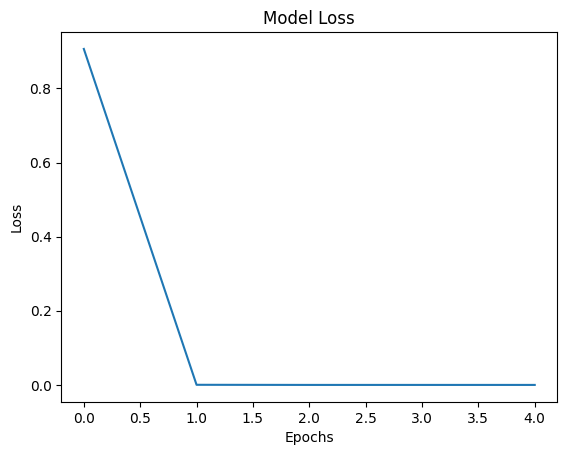

Initial Accuracy: 0.00%


In [7]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Step 6: Report initial accuracy
initial_accuracy = history.history['accuracy'][0]
print(f'Initial Accuracy: {initial_accuracy * 100:.2f}%')